In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
dir_path = tf.keras.utils.get_file(fname="/content/creditcard.csv",origin="https://datahub.io/machine-learning/creditcard/r/creditcard.csv")

In [ ]:
df = pd.read_csv("creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [ ]:
df["Class"].unique()

array(["'0'", "'1'"], dtype=object)

In [ ]:
classes = df["Class"]
df["Class"] = classes=="'0'"
df["Class"].unique()
   

array([ True, False])

In [ ]:
print(pd.value_counts(df["Class"]))

True     284315
False       492
Name: Class, dtype: int64


In [ ]:
sc = StandardScaler()
df["Time"] = sc.fit_transform(df["Time"].values.reshape(-1,1))
df["Amount"] = sc.fit_transform(df["Amount"].values.reshape(-1,1))


In [ ]:
data = df.iloc[:,0:-1]
labels = df.iloc[:,-1]

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,)

In [ ]:
min = train_data.min()
max = train_data.max()
train_data = (train_data-min)/(max-min)
test_data = (test_data - min) / (max-min)

In [ ]:
normal_data_train = train_data[train_labels]
fraud_data_train = train_data[~train_labels]

In [ ]:
input_shape = train_data.shape[1]
input_layer = tf.keras.layers.Input(shape=input_shape)


In [ ]:
encoder = tf.keras.layers.Dense(14,activation="tanh")(input_layer)
encoder = tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(7, activation="relu")(encoder)
encoder = tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(4, activation=tf.nn.leaky_relu)(encoder)

In [ ]:
decoder = tf.keras.layers.Dense(7, activation="relu")(encoder)
decoder = tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(14, activation="relu")(decoder)
decoder = tf.keras.layers.Dense(input_shape, activation="tanh")(decoder)

In [ ]:
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_6 (Dense)             (None, 14)                434       
                                                                 
 dropout_3 (Dropout)         (None, 14)                0         
                                                                 
 dense_7 (Dense)             (None, 7)                 105       
                                                                 
 dropout_4 (Dropout)         (None, 7)                 0         
                                                                 
 dense_8 (Dense)             (None, 4)                 32        
                                                                 
 dense_9 (Dense)             (None, 7)                 35  

In [ ]:
autoencoder.compile(metrics=["accuracy"], optimizer="adam", loss="mean_squared_error")

In [ ]:
history = autoencoder.fit(normal_data_train, normal_data_train, epochs=10, batch_size=64, validation_data=(test_data, test_data))

Epoch 1/10
3332/3332 [==============================] - 7s 2ms/step - loss: 0.0102 - accuracy: 0.9071 - val_loss: 0.0017 - val_accuracy: 0.9544
Epoch 2/10
3332/3332 [==============================] - 6s 2ms/step - loss: 0.0018 - accuracy: 0.9549 - val_loss: 0.0020 - val_accuracy: 0.9544
Epoch 3/10
3332/3332 [==============================] - 6s 2ms/step - loss: 0.0017 - accuracy: 0.9548 - val_loss: 0.0021 - val_accuracy: 0.9544
Epoch 4/10
3332/3332 [==============================] - 8s 2ms/step - loss: 0.0017 - accuracy: 0.9546 - val_loss: 0.0021 - val_accuracy: 0.9544
Epoch 5/10
3332/3332 [==============================] - 6s 2ms/step - loss: 0.0017 - accuracy: 0.9551 - val_loss: 0.0021 - val_accuracy: 0.9544
Epoch 6/10
3332/3332 [==============================] - 6s 2ms/step - loss: 0.0017 - accuracy: 0.9560 - val_loss: 0.0022 - val_accuracy: 0.9544
Epoch 7/10
3332/3332 [==============================] - 6s 2ms/step - loss: 0.0017 - accuracy: 0.9554 - val_loss: 0.0021 - val_accuracy:

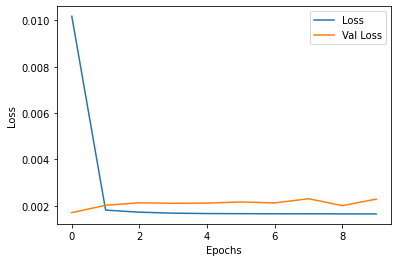

In [ ]:
plt.figure()
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

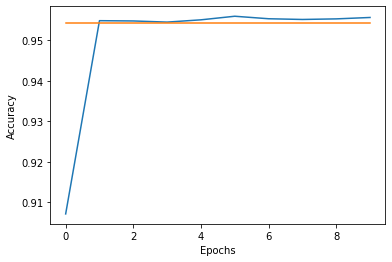

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

6664/6664 [==============================] - 5s 787us/step


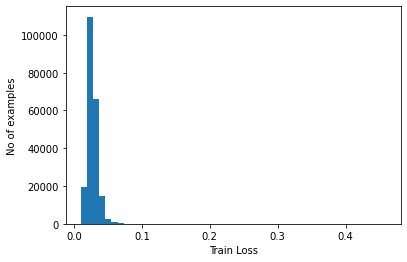

In [ ]:
reconstructions = autoencoder.predict(normal_data_train)
train_loss = tf.keras.losses.mae(reconstructions, normal_data_train)
plt.hist(train_loss[None,:],bins=50)
plt.xlabel("Train Loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ",threshold)

Threshold:  0.03558920462795262


12/12 [==============================] - 0s 1ms/step


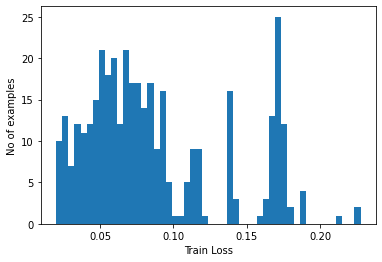

In [ ]:
reconstructions = autoencoder.predict(fraud_data_train)
test_loss = tf.keras.losses.mae(reconstructions, fraud_data_train)
plt.hist(test_loss[None,:],bins=50)
plt.xlabel("Train Loss")
plt.ylabel("No of examples")
plt.show()
